In [1]:
from __future__ import division, print_function
from keras import backend as K
from keras.layers import Input
from keras.callbacks import ModelCheckpoint
from keras.layers.core import Activation, Dense, Dropout, Lambda
from keras.layers.merge import Concatenate
from keras.models import Model, load_model
from keras.utils import np_utils
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
%matplotlib inline

/home/ubuntu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [2]:
# In [2]:
DATA_DIR = ""
IMAGE_DIR = os.path.join(DATA_DIR, "new_test_folder")

BATCH_SIZE = 32
NUM_EPOCHS = 10

In [3]:
# image_dir = 'new_test_folder'
file_name = []
dfcols = ['img_name']
df = pd.DataFrame(columns=dfcols)

for img_file in os.listdir(IMAGE_DIR):
    if img_file.find(".jpg") != -1:
        df = df.append(pd.Series([img_file], index=dfcols),
                            ignore_index=True) 
df = df.sort_values("img_name", ascending=True)
df = df.reset_index(drop=True)
df.to_csv('all.csv', encoding='utf-8', index=False)

In [4]:
print(len(df))

628


In [5]:
group1 = ['0001', '0002', '0003']
group2 = ['0006', '0007', '0008', '0009']
mlabel = ''
all_triples = []
triples = []
for index_1, row_1 in df.iterrows():
    for index_2, row_2 in df.iterrows():
        if index_2 > index_1:
            if row_1['img_name'][2:6] in group1:
                mg_l = '1'
            else:
                mg_l = '2'
            if row_2['img_name'][2:6] in group1:
                mg_r = '1'
            else:
                mg_r = '2'
            mlabel = '0'
            triples = []
            if (row_1['img_name'][0:2] == row_2['img_name'][0:2] and mg_l == '2' and mg_r == '2') :   
                mlabel = '1'
                triples = [row_1['img_name'],row_2['img_name'],mlabel]
#             if (row_1['img_name'][0:2] != row_2['img_name'][0:2] and mg_l == '2' and mg_r == '2') :   
#                 mlabel = '0'
#                 triples = [row_1['img_name'],row_2['img_name'],mlabel]
            if (row_1['img_name'][0:2] == row_2['img_name'][0:2] and mg_l != mg_r ) :   
                mlabel = '0'
                triples = [row_1['img_name'],row_2['img_name'],mlabel]
            if len(triples) != 0 :    
                all_triples.append(triples)

In [6]:
print(len(all_triples))

4469


In [9]:
df_pair = pd.DataFrame(all_triples)
df_pair.head()

,0,1,2
0,010001.jpg,010006.jpg,0
1,010001.jpg,010007.jpg,0
2,010001.jpg,010008.jpg,0
3,010001.jpg,010009.jpg,0
4,010001.jpg,010010.jpg,0


In [10]:
import random

neg = []
neg = df_pair[df_pair[2]=='0'].values.tolist() # 1425
random.shuffle(neg)
neg

[['110001.jpg', '110016.jpg', '0'],
 ['420002.jpg', '420011.jpg', '0'],
 ['270001.jpg', '270007.jpg', '0'],
 ['010001.jpg', '010010.jpg', '0'],
 ['130003.jpg', '130019.jpg', '0'],
 ['400002.jpg', '400012.jpg', '0'],
 ['460001.jpg', '460011.jpg', '0'],
 ['160001.jpg', '160010.jpg', '0'],
 ['330003.jpg', '330023.jpg', '0'],
 ['440002.jpg', '440014.jpg', '0'],
 ['430001.jpg', '430010.jpg', '0'],
 ['020003.jpg', '020009.jpg', '0'],
 ['090003.jpg', '090013.jpg', '0'],
 ['250003.jpg', '250011.jpg', '0'],
 ['070001.jpg', '070007.jpg', '0'],
 ['220002.jpg', '220014.jpg', '0'],
 ['220001.jpg', '220015.jpg', '0'],
 ['020001.jpg', '020007.jpg', '0'],
 ['400003.jpg', '400012.jpg', '0'],
 ['440003.jpg', '440006.jpg', '0'],
 ['210001.jpg', '210008.jpg', '0'],
 ['090002.jpg', '090016.jpg', '0'],
 ['120003.jpg', '120010.jpg', '0'],
 ['160001.jpg', '160009.jpg', '0'],
 ['340001.jpg', '340013.jpg', '0'],
 ['360002.jpg', '360008.jpg', '0'],
 ['080001.jpg', '080023.jpg', '0'],
 ['300003.jpg', '300019.jpg'

In [11]:
df_pair_pos = pd.DataFrame
df_pair_pos = df_pair[df_pair[2]=='1'].sample(n=len(neg))
df_pair_pos.head()

,0,1,2
1169,110006.jpg,110014.jpg,1
1041,090018.jpg,090019.jpg,1
3421,340015.jpg,340019.jpg,1
2432,220006.jpg,220017.jpg,1
4321,440013.jpg,440021.jpg,1


In [12]:
pos = []
pos = df_pair_pos.values.tolist() # 3044
pos

[['110006.jpg', '110014.jpg', '1'],
 ['090018.jpg', '090019.jpg', '1'],
 ['340015.jpg', '340019.jpg', '1'],
 ['220006.jpg', '220017.jpg', '1'],
 ['440013.jpg', '440021.jpg', '1'],
 ['440008.jpg', '440020.jpg', '1'],
 ['220014.jpg', '220016.jpg', '1'],
 ['160012.jpg', '160017.jpg', '1'],
 ['130014.jpg', '130018.jpg', '1'],
 ['080016.jpg', '080023.jpg', '1'],
 ['160009.jpg', '160018.jpg', '1'],
 ['170008.jpg', '170011.jpg', '1'],
 ['080015.jpg', '080018.jpg', '1'],
 ['100012.jpg', '100013.jpg', '1'],
 ['080006.jpg', '080022.jpg', '1'],
 ['440016.jpg', '440023.jpg', '1'],
 ['090017.jpg', '090019.jpg', '1'],
 ['020007.jpg', '020016.jpg', '1'],
 ['360011.jpg', '360014.jpg', '1'],
 ['410008.jpg', '410009.jpg', '1'],
 ['460013.jpg', '460015.jpg', '1'],
 ['300015.jpg', '300020.jpg', '1'],
 ['100008.jpg', '100010.jpg', '1'],
 ['040016.jpg', '040017.jpg', '1'],
 ['080017.jpg', '080018.jpg', '1'],
 ['160016.jpg', '160020.jpg', '1'],
 ['300006.jpg', '300021.jpg', '1'],
 ['190006.jpg', '190013.jpg'

In [13]:
'''
# In [3]:
def get_holiday_triples(image_dir):
    image_groups = {}
    for image_name in os.listdir(image_dir):
        base_name = image_name[0:-4]
        group_name = base_name[0:4]
        if group_name in image_groups:
            image_groups[group_name].append(image_name)
        else:
            image_groups[group_name] = [image_name]
    num_sims = 0
    image_triples = []
    group_list = sorted(list(image_groups.keys()))
    for i, g in enumerate(group_list):
        if num_sims % 100 == 0:
            print("Generated {:d} pos + {:d} neg = {:d} total image triples"
                  .format(num_sims, num_sims, 2*num_sims))
        images_in_group = image_groups[g]
        sim_pairs_it = itertools.combinations(images_in_group, 2)
        # for each similar pair, generate a corresponding different pair
        for ref_image, sim_image in sim_pairs_it:
            image_triples.append((ref_image, sim_image, 1))
            num_sims += 1
            while True:
                j = np.random.randint(low=0, high=len(group_list), size=1)[0]
                if j != i:
                    break
            dif_image_candidates = image_groups[group_list[j]]
            k = np.random.randint(low=0, high=len(dif_image_candidates), size=1)[0]
            dif_image = dif_image_candidates[k]
            image_triples.append((ref_image, dif_image, 0))
    print("Generated {:d} pos + {:d} neg = {:d} total image triples"
          .format(num_sims, num_sims, 2*num_sims))
    return image_triples
'''    

def load_vectors(vector_file):
    vec_dict = {}
    fvec = open(vector_file, "r")
    for line in fvec:
        image_name, image_vec = line.strip().split("\t")
        vec = np.array([float(v) for v in image_vec.split(",")])
        vec_dict[image_name] = vec
    fvec.close()
    return vec_dict

def train_test_split(triples, splits):
    assert sum(splits) == 1.0
    split_pts = np.cumsum(np.array([0.] + splits))
    indices = np.random.permutation(np.arange(len(triples)))
    shuffled_triples = [triples[i] for i in indices]
    data_splits = []
    for sid in range(len(splits)):
        start = int(split_pts[sid] * len(triples))
        end = int(split_pts[sid + 1] * len(triples))
        data_splits.append(shuffled_triples[start:end])
    return data_splits

def batch_to_vectors(batch, vec_size, vec_dict):
    X1 = np.zeros((len(batch), vec_size))
    X2 = np.zeros((len(batch), vec_size))
    Y = np.zeros((len(batch), 2))
    for tid in range(len(batch)):
        X1[tid] = vec_dict[batch[tid][0]]
        X2[tid] = vec_dict[batch[tid][1]]
        Y[tid] = [1, 0] if batch[tid][2] == 0 else [0, 1]
    return ([X1, X2], Y)
    
def data_generator(triples, vec_size, vec_dict, batch_size=32):
    while True:
        # shuffle once per batch
        indices = np.random.permutation(np.arange(len(triples)))
        num_batches = len(triples) // batch_size
        for bid in range(num_batches):
            batch_indices = indices[bid * batch_size : (bid + 1) * batch_size]
            batch = [triples[i] for i in batch_indices]
            yield batch_to_vectors(batch, vec_size, vec_dict)

def evaluate_model(model_file, test_gen):
    model_name = os.path.basename(model_file)
    model = load_model(model_file)
    print("=== Evaluating model: {:s} ===".format(model_name))
    ytrue, ypred = [], []
    num_test_steps = len(test_triples) // BATCH_SIZE
    for i in range(num_test_steps):
        (X1, X2), Y = test_gen.__next__()
        Y_ = model.predict([X1, X2])
        ytrue.extend(np.argmax(Y, axis=1).tolist())
        ypred.extend(np.argmax(Y_, axis=1).tolist())
        print(ytrue, ypred)
    accuracy = accuracy_score(ytrue, ypred)
    print("\nAccuracy: {:.3f}".format(accuracy))
    print("\nConfusion Matrix")
    print(confusion_matrix(ytrue, ypred))
    print("\nClassification Report")
    print(classification_report(ytrue, ypred))
    return accuracy

def get_model_file(data_dir, vector_name, merge_mode, borf):
    return os.path.join(data_dir, "models", "A_A_{:s}-{:s}-{:s}_10_v2.h5"
                        .format(vector_name, merge_mode, borf))

In [14]:
# Declare and Extract Common Data
# In [4]:
VECTORIZERS = ["InceptionV3", "ResNet"]
MERGE_MODES = ["Concat", "Dot", "AbsDiff", "Euclidean"]
scores = np.zeros((len(VECTORIZERS), len(MERGE_MODES)))
# In [5]:
image_triples = pos + neg # all_triples # get_holiday_triples(IMAGE_DIR)

In [15]:
# In [6]:
train_triples, val_triples, test_triples = train_test_split(image_triples, 
                                                            splits=[0.7, 0.1, 0.2])
print(len(train_triples), len(val_triples), len(test_triples))

# InceptionV3 Vectors
# In [7]:
VECTOR_SIZE = 2048
VECTOR_FILE = os.path.join(DATA_DIR, "weights", "accton-inception-vectors-v2.tsv")
# In [8]:
vec_dict = load_vectors(VECTOR_FILE)

1994 286 570


In [16]:
test_triples

[['350003.jpg', '350009.jpg', '0'],
 ['280006.jpg', '280009.jpg', '1'],
 ['290003.jpg', '290008.jpg', '0'],
 ['050002.jpg', '050012.jpg', '0'],
 ['160002.jpg', '160012.jpg', '0'],
 ['110001.jpg', '110008.jpg', '0'],
 ['060002.jpg', '060007.jpg', '0'],
 ['020015.jpg', '020016.jpg', '1'],
 ['050014.jpg', '050022.jpg', '1'],
 ['420003.jpg', '420016.jpg', '0'],
 ['020003.jpg', '020015.jpg', '0'],
 ['410003.jpg', '410011.jpg', '0'],
 ['270002.jpg', '270008.jpg', '0'],
 ['430001.jpg', '430006.jpg', '0'],
 ['130001.jpg', '130012.jpg', '0'],
 ['330008.jpg', '330020.jpg', '1'],
 ['070010.jpg', '070012.jpg', '1'],
 ['160006.jpg', '160017.jpg', '1'],
 ['140006.jpg', '140010.jpg', '1'],
 ['420003.jpg', '420018.jpg', '0'],
 ['070012.jpg', '070014.jpg', '1'],
 ['030006.jpg', '030009.jpg', '1'],
 ['170003.jpg', '170007.jpg', '0'],
 ['420009.jpg', '420012.jpg', '1'],
 ['060001.jpg', '060008.jpg', '0'],
 ['410001.jpg', '410008.jpg', '0'],
 ['330015.jpg', '330019.jpg', '1'],
 ['340002.jpg', '340014.jpg'

Epoch 1/10
62/62 [==============================] - 2s 26ms/step - loss: 0.0119 - acc: 0.9919 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 2/10
62/62 [==============================] - 1s 20ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 3/10
62/62 [==============================] - 1s 20ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 4/10
62/62 [==============================] - 1s 20ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5/10
62/62 [==============================] - 1s 20ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6/10
62/62 [==============================] - 1s 20ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7/10
62/62 [==============================] - 1s 20ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8/10
62/62 [=============

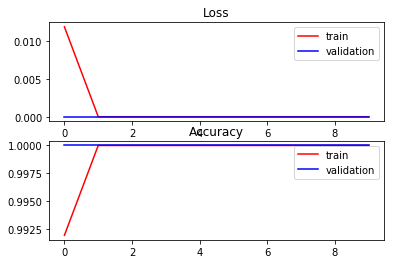

=== Evaluating model: A_A_inceptionv3-cat-final_10_v2.h5 ===
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

=== Evaluating model: A_A_inceptionv3-cat-best_10_v2.h5 ===
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [18]:
# Input: Concatenate Vectors
# In [9]:
train_gen = data_generator(train_triples, VECTOR_SIZE, vec_dict, BATCH_SIZE)
val_gen = data_generator(val_triples, VECTOR_SIZE, vec_dict, BATCH_SIZE)
# In [10]:
input_1 = Input(shape=(VECTOR_SIZE,))
input_2 = Input(shape=(VECTOR_SIZE,))
merged = Concatenate(axis=-1)([input_1, input_2]) ###

fc1 = Dense(512, kernel_initializer="glorot_uniform")(merged)
fc1 = Dropout(0.2)(fc1)
fc1 = Activation("relu")(fc1)

fc2 = Dense(128, kernel_initializer="glorot_uniform")(fc1)
fc2 = Dropout(0.2)(fc2)
fc2 = Activation("relu")(fc2)

pred = Dense(2, kernel_initializer="glorot_uniform")(fc2)
pred = Activation("softmax")(pred)

# In [11]:
model = Model(inputs=[input_1, input_2], outputs=pred)
# model.summary()
# In [12]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
# In [13]:
best_model_name = get_model_file(DATA_DIR, "inceptionv3", "cat", "best")
checkpoint = ModelCheckpoint(best_model_name, save_best_only=True)
train_steps_per_epoch = len(train_triples) // BATCH_SIZE
val_steps_per_epoch = len(val_triples) // BATCH_SIZE
history = model.fit_generator(train_gen, steps_per_epoch=train_steps_per_epoch, 
                              epochs=NUM_EPOCHS, 
                              validation_data=val_gen, validation_steps=val_steps_per_epoch,
                              callbacks=[checkpoint])

# In [14]:
plt.subplot(211)
plt.title("Loss")
plt.plot(history.history["loss"], color="r", label="train")
plt.plot(history.history["val_loss"], color="b", label="validation")
plt.legend(loc="best")

plt.subplot(212)
plt.title("Accuracy")
plt.plot(history.history["acc"], color="r", label="train")
plt.plot(history.history["val_acc"], color="b", label="validation")
plt.legend(loc="best")

plt.show()

# In [15]:
final_model_name = get_model_file(DATA_DIR, "inceptionv3", "cat", "final")
model.save(final_model_name)
test_gen = data_generator(test_triples, VECTOR_SIZE, vec_dict, BATCH_SIZE)
final_accuracy = evaluate_model(final_model_name, test_gen)

test_gen = data_generator(test_triples, VECTOR_SIZE, vec_dict, BATCH_SIZE)
best_accuracy = evaluate_model(best_model_name, test_gen)

scores[0, 0] = best_accuracy if best_accuracy > final_accuracy else final_accuracy

(10,) (10,)
(10,)
Epoch 1/10
97/97 [==============================] - 2s 19ms/step - loss: 0.0089 - acc: 0.9939 - val_loss: 1.1978e-07 - val_acc: 1.0000
Epoch 2/10
97/97 [==============================] - 2s 16ms/step - loss: 1.2545e-07 - acc: 1.0000 - val_loss: 1.2036e-07 - val_acc: 1.0000
Epoch 3/10
97/97 [==============================] - 1s 15ms/step - loss: 1.2395e-07 - acc: 1.0000 - val_loss: 1.1978e-07 - val_acc: 1.0000
Epoch 4/10
97/97 [==============================] - 2s 16ms/step - loss: 1.2305e-07 - acc: 1.0000 - val_loss: 1.1964e-07 - val_acc: 1.0000
Epoch 5/10
97/97 [==============================] - 2s 16ms/step - loss: 1.2317e-07 - acc: 1.0000 - val_loss: 1.1950e-07 - val_acc: 1.0000
Epoch 6/10
97/97 [==============================] - 2s 16ms/step - loss: 1.2380e-07 - acc: 1.0000 - val_loss: 1.1950e-07 - val_acc: 1.0000
Epoch 7/10
97/97 [==============================] - 2s 16ms/step - loss: 1.2361e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8/10
97

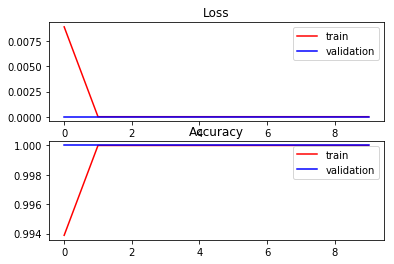

=== Evaluating model: A_A_inceptionv3-dot-final_10_v2.h5 ===

Accuracy: 1.000

Confusion Matrix
[[864]]

Classification Report
             precision    recall  f1-score   support

          1       1.00      1.00      1.00       864

avg / total       1.00      1.00      1.00       864

=== Evaluating model: A_A_inceptionv3-dot-best_10_v2.h5 ===

Accuracy: 1.000

Confusion Matrix
[[864]]

Classification Report
             precision    recall  f1-score   support

          1       1.00      1.00      1.00       864

avg / total       1.00      1.00      1.00       864



In [12]:
# Input: Elementwise Cosine Distance
# In [16]:
train_gen = data_generator(train_triples, VECTOR_SIZE, vec_dict, BATCH_SIZE)
val_gen = data_generator(val_triples, VECTOR_SIZE, vec_dict, BATCH_SIZE)

# In [17]:
def cosine_distance(vecs, normalize=False):
    x, y = vecs
    if normalize:
        x = K.l2_normalize(x, axis=0)
        y = K.l2_normalize(x, axis=0)
    return K.prod(K.stack([x, y], axis=1), axis=1)

def cosine_distance_output_shape(shapes):
    return shapes[0]

vecs = [np.random.random((10,)), np.random.random((10,))]
print(vecs[0].shape, vecs[1].shape)
s = cosine_distance(vecs)
print(s.shape)
# (10,) (10,)
# (10,)
# In [18]:
input_1 = Input(shape=(VECTOR_SIZE,))
input_2 = Input(shape=(VECTOR_SIZE,))
merged = Lambda(cosine_distance, 
                  output_shape=cosine_distance_output_shape)([input_1, input_2]) ###

fc1 = Dense(512, kernel_initializer="glorot_uniform")(merged)
fc1 = Dropout(0.2)(fc1)
fc1 = Activation("relu")(fc1)

fc2 = Dense(128, kernel_initializer="glorot_uniform")(fc1)
fc2 = Dropout(0.2)(fc2)
fc2 = Activation("relu")(fc2)

pred = Dense(2, kernel_initializer="glorot_uniform")(fc2)
pred = Activation("softmax")(pred)
# In [19]:
model = Model(inputs=[input_1, input_2], outputs=pred)
# model.summary()
# In [20]:
model.compile(optimizer="Nadam", loss="categorical_crossentropy", metrics=["accuracy"])
# In [21]:
best_model_name = get_model_file(DATA_DIR, "inceptionv3", "dot", "best")
checkpoint = ModelCheckpoint(best_model_name, save_best_only=True)
train_steps_per_epoch = len(train_triples) // BATCH_SIZE
val_steps_per_epoch = len(val_triples) // BATCH_SIZE
history = model.fit_generator(train_gen, steps_per_epoch=train_steps_per_epoch, 
                              epochs=NUM_EPOCHS, 
                              validation_data=val_gen, validation_steps=val_steps_per_epoch,
                              callbacks=[checkpoint])

# In [22]:
plt.subplot(211)
plt.title("Loss")
plt.plot(history.history["loss"], color="r", label="train")
plt.plot(history.history["val_loss"], color="b", label="validation")
plt.legend(loc="best")

plt.subplot(212)
plt.title("Accuracy")
plt.plot(history.history["acc"], color="r", label="train")
plt.plot(history.history["val_acc"], color="b", label="validation")
plt.legend(loc="best")

plt.show()

# In [23]:
final_model_name = get_model_file(DATA_DIR, "inceptionv3", "dot", "final")
model.save(final_model_name)
test_gen = data_generator(test_triples, VECTOR_SIZE, vec_dict, BATCH_SIZE)
final_accuracy = evaluate_model(final_model_name, test_gen)

test_gen = data_generator(test_triples, VECTOR_SIZE, vec_dict, BATCH_SIZE)
best_accuracy = evaluate_model(best_model_name, test_gen)

scores[0, 1] = best_accuracy if best_accuracy > final_accuracy else final_accuracy
# === Evaluating model: inceptionv3-dot-final.h5 ===


(10,) (10,)
(10,)
Epoch 1/10
97/97 [==============================] - 2s 20ms/step - loss: 0.0097 - acc: 0.9936 - val_loss: 7.1904e-07 - val_acc: 1.0000
Epoch 2/10
97/97 [==============================] - 2s 16ms/step - loss: 1.6083e-04 - acc: 1.0000 - val_loss: 2.2352e-07 - val_acc: 1.0000
Epoch 3/10
97/97 [==============================] - 2s 16ms/step - loss: 1.0658e-04 - acc: 1.0000 - val_loss: 1.2867e-07 - val_acc: 1.0000
Epoch 4/10
97/97 [==============================] - 2s 16ms/step - loss: 8.1073e-05 - acc: 1.0000 - val_loss: 1.1950e-07 - val_acc: 1.0000
Epoch 5/10
97/97 [==============================] - 2s 16ms/step - loss: 3.3320e-05 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6/10
97/97 [==============================] - 2s 16ms/step - loss: 1.7082e-05 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7/10
97/97 [==============================] - 2s 16ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8/10
97

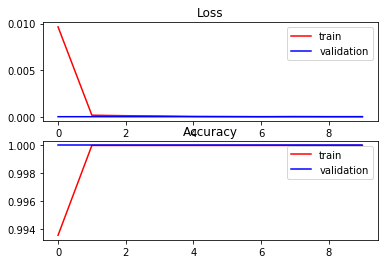

=== Evaluating model: A_A_inceptionv3-l1-final_10_v2.h5 ===

Accuracy: 1.000

Confusion Matrix
[[864]]

Classification Report
             precision    recall  f1-score   support

          1       1.00      1.00      1.00       864

avg / total       1.00      1.00      1.00       864

=== Evaluating model: A_A_inceptionv3-l1-best_10_v2.h5 ===

Accuracy: 1.000

Confusion Matrix
[[864]]

Classification Report
             precision    recall  f1-score   support

          1       1.00      1.00      1.00       864

avg / total       1.00      1.00      1.00       864



In [13]:
# In [24]:
train_gen = data_generator(train_triples, VECTOR_SIZE, vec_dict, BATCH_SIZE)
val_gen = data_generator(val_triples, VECTOR_SIZE, vec_dict, BATCH_SIZE)
# In [25]:
def absdiff(vecs):
    x, y = vecs
    return K.abs(K.sum(K.stack([x, -y], axis=1), axis=1))

'''
abs 元素级的绝对值操作。
'''

def absdiff_output_shape(shapes):
    return shapes[0]

vecs = [np.random.random((10,)), np.random.random((10,))]
print(vecs[0].shape, vecs[1].shape)
s = absdiff(vecs)
print(s.shape)

# In [26]:
input_1 = Input(shape=(VECTOR_SIZE,))
input_2 = Input(shape=(VECTOR_SIZE,))
merged = Lambda(absdiff, output_shape=absdiff_output_shape)([input_1, input_2])

fc1 = Dense(512, kernel_initializer="glorot_uniform")(merged)
fc1 = Dropout(0.2)(fc1)
fc1 = Activation("relu")(fc1)

fc2 = Dense(128, kernel_initializer="glorot_uniform")(fc1)
fc2 = Dropout(0.2)(fc2)
fc2 = Activation("relu")(fc2)

pred = Dense(2, kernel_initializer="glorot_uniform")(fc2)
pred = Activation("softmax")(pred)
# In [27]:
model = Model(inputs=[input_1, input_2], outputs=pred)
# model.summary()
# In [28]:
model.compile(optimizer="Nadam", loss="categorical_crossentropy", metrics=["accuracy"])
# In [29]:
best_model_name = get_model_file(DATA_DIR, "inceptionv3", "l1", "best")
checkpoint = ModelCheckpoint(best_model_name, save_best_only=True)
train_steps_per_epoch = len(train_triples) // BATCH_SIZE
val_steps_per_epoch = len(val_triples) // BATCH_SIZE
history = model.fit_generator(train_gen, steps_per_epoch=train_steps_per_epoch, 
                              epochs=NUM_EPOCHS, 
                              validation_data=val_gen, validation_steps=val_steps_per_epoch,
                              callbacks=[checkpoint])

# In [30]:
plt.subplot(211)
plt.title("Loss")
plt.plot(history.history["loss"], color="r", label="train")
plt.plot(history.history["val_loss"], color="b", label="validation")
plt.legend(loc="best")

plt.subplot(212)
plt.title("Accuracy")
plt.plot(history.history["acc"], color="r", label="train")
plt.plot(history.history["val_acc"], color="b", label="validation")
plt.legend(loc="best")

plt.show()

# In [31]:
final_model_name = get_model_file(DATA_DIR, "inceptionv3", "l1", "final")
model.save(final_model_name)
test_gen = data_generator(test_triples, VECTOR_SIZE, vec_dict, BATCH_SIZE)
final_accuracy = evaluate_model(final_model_name, test_gen)

test_gen = data_generator(test_triples, VECTOR_SIZE, vec_dict, BATCH_SIZE)
best_accuracy = evaluate_model(best_model_name, test_gen)

scores[0, 2] = best_accuracy if best_accuracy > final_accuracy else final_accuracy
# === Evaluating model: inceptionv3-l1-final.h5 ===

(10,) (10,)
(10,)
Epoch 1/10
97/97 [==============================] - 2s 21ms/step - loss: 0.0055 - acc: 0.9997 - val_loss: 1.4199e-07 - val_acc: 1.0000
Epoch 2/10
97/97 [==============================] - 2s 16ms/step - loss: 1.7401e-04 - acc: 1.0000 - val_loss: 1.2465e-07 - val_acc: 1.0000
Epoch 3/10
97/97 [==============================] - 2s 16ms/step - loss: 1.4817e-04 - acc: 1.0000 - val_loss: 1.1964e-07 - val_acc: 1.0000
Epoch 4/10
97/97 [==============================] - 2s 16ms/step - loss: 1.0589e-04 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5/10
97/97 [==============================] - 2s 16ms/step - loss: 7.0057e-05 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6/10
97/97 [==============================] - 2s 16ms/step - loss: 3.8902e-05 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7/10
97/97 [==============================] - 2s 16ms/step - loss: 1.5133e-05 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8/10
97

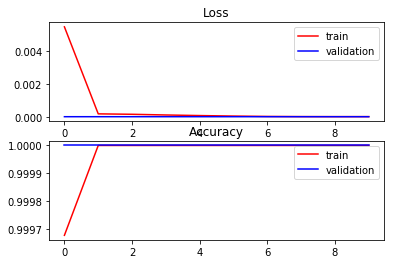

=== Evaluating model: A_A_inceptionv3-l2-final_10_v2.h5 ===

Accuracy: 1.000

Confusion Matrix
[[864]]

Classification Report
             precision    recall  f1-score   support

          1       1.00      1.00      1.00       864

avg / total       1.00      1.00      1.00       864

=== Evaluating model: A_A_inceptionv3-l2-best_10_v2.h5 ===

Accuracy: 1.000

Confusion Matrix
[[864]]

Classification Report
             precision    recall  f1-score   support

          1       1.00      1.00      1.00       864

avg / total       1.00      1.00      1.00       864



In [14]:
# Input: Elementwise Euclidean Distance
# In [32]:
train_gen = data_generator(train_triples, VECTOR_SIZE, vec_dict, BATCH_SIZE)
val_gen = data_generator(val_triples, VECTOR_SIZE, vec_dict, BATCH_SIZE)
# In [33]:
def euclidean_distance(vecs):
    x, y = vecs
    return K.sqrt(K.sum(K.stack([K.square(x), -K.square(y)], axis=1), axis=1))

'''
stack  将秩 为 R 的张量列表堆叠成秩为 R + 1 的张量。
square 元素级的平方操作。
sum    计算张量在某一指定轴的和。
sqrt   元素级的平方根操作。
'''

def euclidean_distance_output_shape(shapes):
    xshape, yshape = shapes
    return xshape

vecs = [np.random.random((10,)), np.random.random((10,))]
print(vecs[0].shape, vecs[1].shape)
s = euclidean_distance(vecs)
print(s.shape)

# In [34]:
input_1 = Input(shape=(VECTOR_SIZE,))
input_2 = Input(shape=(VECTOR_SIZE,))
merged = Lambda(euclidean_distance, 
                output_shape=euclidean_distance_output_shape)([input_1, input_2])

fc1 = Dense(512, kernel_initializer="glorot_uniform")(merged)
fc1 = Dropout(0.2)(fc1)
fc1 = Activation("relu")(fc1)

fc2 = Dense(128, kernel_initializer="glorot_uniform")(fc1)
fc2 = Dropout(0.2)(fc2)
fc2 = Activation("relu")(fc2)

pred = Dense(2, kernel_initializer="glorot_uniform")(fc2)
pred = Activation("softmax")(pred)
# In [35]:
model = Model(inputs=[input_1, input_2], outputs=pred)
# model.summary()
# In [36]:
model.compile(optimizer="Nadam", loss="categorical_crossentropy", metrics=["accuracy"])
# In [37]:
best_model_name = get_model_file(DATA_DIR, "inceptionv3", "l2", "best")
checkpoint = ModelCheckpoint(best_model_name, save_best_only=True)
train_steps_per_epoch = len(train_triples) // BATCH_SIZE
val_steps_per_epoch = len(val_triples) // BATCH_SIZE
history = model.fit_generator(train_gen, steps_per_epoch=train_steps_per_epoch, 
                              epochs=NUM_EPOCHS, 
                              validation_data=val_gen, validation_steps=val_steps_per_epoch,
                              callbacks=[checkpoint])

plt.subplot(211)
plt.title("Loss")
plt.plot(history.history["loss"], color="r", label="train")
plt.plot(history.history["val_loss"], color="b", label="validation")
plt.legend(loc="best")

plt.subplot(212)
plt.title("Accuracy")
plt.plot(history.history["acc"], color="r", label="train")
plt.plot(history.history["val_acc"], color="b", label="validation")
plt.legend(loc="best")

plt.show()

# In [39]:
final_model_name = get_model_file(DATA_DIR, "inceptionv3", "l2", "final")
model.save(final_model_name)
test_gen = data_generator(test_triples, VECTOR_SIZE, vec_dict, BATCH_SIZE)
final_accuracy = evaluate_model(final_model_name, test_gen)

test_gen = data_generator(test_triples, VECTOR_SIZE, vec_dict, BATCH_SIZE)
best_accuracy = evaluate_model(best_model_name, test_gen)

scores[0, 3] = best_accuracy if best_accuracy > final_accuracy else final_accuracy
# === Evaluating model: inceptionv3-l2-final.h5 ===

=== Evaluating model: A_A_resnet50-cat-final_10_v2.h5 ===

Accuracy: 1.000

Confusion Matrix
[[864]]

Classification Report
             precision    recall  f1-score   support

          1       1.00      1.00      1.00       864

avg / total       1.00      1.00      1.00       864

=== Evaluating model: A_A_inceptionv3-l2-best_10_v2.h5 ===

Accuracy: 1.000

Confusion Matrix
[[864]]

Classification Report
             precision    recall  f1-score   support

          1       1.00      1.00      1.00       864

avg / total       1.00      1.00      1.00       864

Epoch 1/10
97/97 [==============================] - 2s 21ms/step - loss: 0.0085 - acc: 0.9942 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 2/10
97/97 [==============================] - 1s 14ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 3/10
97/97 [==============================] - 1s 14ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 4/10
97/

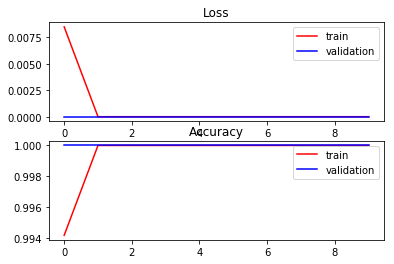

In [15]:
# In [48]:
final_model_name = get_model_file(DATA_DIR, "resnet50", "cat", "final")
model.save(final_model_name)
test_gen = data_generator(test_triples, VECTOR_SIZE, vec_dict, BATCH_SIZE)
final_accuracy = evaluate_model(final_model_name, test_gen)

test_gen = data_generator(test_triples, VECTOR_SIZE, vec_dict, BATCH_SIZE)
best_accuracy = evaluate_model(best_model_name, test_gen)

scores[1, 0] = best_accuracy if best_accuracy > final_accuracy else final_accuracy
# === Evaluating model: resnet50-cat-final.h5 ===


# Input: Elementwise Cosine Distance
# In [49]:
train_gen = data_generator(train_triples, VECTOR_SIZE, vec_dict, BATCH_SIZE)
val_gen = data_generator(val_triples, VECTOR_SIZE, vec_dict, BATCH_SIZE)
# In [50]:
input_1 = Input(shape=(VECTOR_SIZE,))
input_2 = Input(shape=(VECTOR_SIZE,))
merged = Lambda(cosine_distance, 
                  output_shape=cosine_distance_output_shape)([input_1, input_2])

fc1 = Dense(512, kernel_initializer="glorot_uniform")(merged)
fc1 = Dropout(0.2)(fc1)
fc1 = Activation("relu")(fc1)

fc2 = Dense(128, kernel_initializer="glorot_uniform")(fc1)
fc2 = Dropout(0.2)(fc2)
fc2 = Activation("relu")(fc2)

pred = Dense(2, kernel_initializer="glorot_uniform")(fc2)
pred = Activation("softmax")(pred)
# In [51]:
model = Model(inputs=[input_1, input_2], outputs=pred)
# model.summary()
# In [52]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
# In [53]:
best_model_name = get_model_file(DATA_DIR, "resnet50", "dot", "best")
checkpoint = ModelCheckpoint(best_model_name, save_best_only=True)
train_steps_per_epoch = len(train_triples) // BATCH_SIZE
val_steps_per_epoch = len(val_triples) // BATCH_SIZE
history = model.fit_generator(train_gen, steps_per_epoch=train_steps_per_epoch, 
                              epochs=NUM_EPOCHS, 
                              validation_data=val_gen, validation_steps=val_steps_per_epoch,
                              callbacks=[checkpoint])

# In [54]:
plt.subplot(211)
plt.title("Loss")
plt.plot(history.history["loss"], color="r", label="train")
plt.plot(history.history["val_loss"], color="b", label="validation")
plt.legend(loc="best")

plt.subplot(212)
plt.title("Accuracy")
plt.plot(history.history["acc"], color="r", label="train")
plt.plot(history.history["val_acc"], color="b", label="validation")
plt.legend(loc="best")

plt.show()

Epoch 1/10
97/97 [==============================] - 3s 29ms/step - loss: 0.0099 - acc: 0.9939 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 2/10
97/97 [==============================] - 2s 20ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 3/10
97/97 [==============================] - 2s 20ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 4/10
97/97 [==============================] - 2s 20ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5/10
97/97 [==============================] - 2s 20ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6/10
97/97 [==============================] - 2s 20ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7/10
97/97 [==============================] - 2s 20ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8/10
97/97 [=============

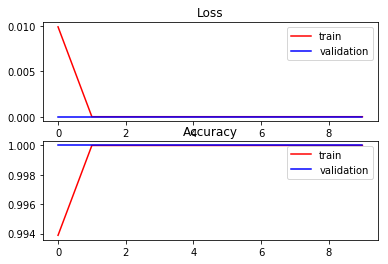

In [17]:
# ResNet 50 Vectors
# In [40]:
VECTOR_SIZE = 2048
VECTOR_FILE = os.path.join(DATA_DIR, "weights", "accton-resnet-vectors-v2.tsv")
# In [41]:
vec_dict = load_vectors(VECTOR_FILE)
# Input: Concatenate vectors
# In [42]:
train_gen = data_generator(train_triples, VECTOR_SIZE, vec_dict, BATCH_SIZE)
val_gen = data_generator(val_triples, VECTOR_SIZE, vec_dict, BATCH_SIZE)
# In [43]:
input_1 = Input(shape=(VECTOR_SIZE,))
input_2 = Input(shape=(VECTOR_SIZE,))
merged = Concatenate(axis=-1)([input_1, input_2])

fc1 = Dense(512, kernel_initializer="glorot_uniform")(merged)
fc1 = Dropout(0.2)(fc1)
fc1 = Activation("relu")(fc1)

fc2 = Dense(128, kernel_initializer="glorot_uniform")(fc1)
fc2 = Dropout(0.2)(fc2)
fc2 = Activation("relu")(fc2)

pred = Dense(2, kernel_initializer="glorot_uniform")(fc2)
pred = Activation("softmax")(pred)
# In [44]:
model = Model(inputs=[input_1, input_2], outputs=pred)
# model.summary()
# In [45]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
# In [46]:
best_model_name = get_model_file(DATA_DIR, "resnet50", "cat", "best")
checkpoint = ModelCheckpoint(best_model_name, save_best_only=True)
train_steps_per_epoch = len(train_triples) // BATCH_SIZE
val_steps_per_epoch = len(val_triples) // BATCH_SIZE
history = model.fit_generator(train_gen, steps_per_epoch=train_steps_per_epoch, 
                              epochs=NUM_EPOCHS, 
                              validation_data=val_gen, validation_steps=val_steps_per_epoch,
                              callbacks=[checkpoint])

# In [47]:
plt.subplot(211)
plt.title("Loss")
plt.plot(history.history["loss"], color="r", label="train")
plt.plot(history.history["val_loss"], color="b", label="validation")
plt.legend(loc="best")

plt.subplot(212)
plt.title("Accuracy")
plt.plot(history.history["acc"], color="r", label="train")
plt.plot(history.history["val_acc"], color="b", label="validation")
plt.legend(loc="best")

plt.show()

=== Evaluating model: A_A_resnet50-dot-final_10_v2.h5 ===

Accuracy: 1.000

Confusion Matrix
[[864]]

Classification Report
             precision    recall  f1-score   support

          1       1.00      1.00      1.00       864

avg / total       1.00      1.00      1.00       864

=== Evaluating model: A_A_resnet50-cat-best_10_v2.h5 ===

Accuracy: 1.000

Confusion Matrix
[[864]]

Classification Report
             precision    recall  f1-score   support

          1       1.00      1.00      1.00       864

avg / total       1.00      1.00      1.00       864

Epoch 1/10
97/97 [==============================] - 2s 25ms/step - loss: 0.0081 - acc: 0.9952 - val_loss: 2.2864e-06 - val_acc: 1.0000
Epoch 2/10
97/97 [==============================] - 1s 15ms/step - loss: 1.5811e-04 - acc: 1.0000 - val_loss: 8.2146e-07 - val_acc: 1.0000
Epoch 3/10
97/97 [==============================] - 1s 14ms/step - loss: 1.3724e-04 - acc: 1.0000 - val_loss: 6.0465e-07 - val_acc: 1.0000
Epoch 4/10
97/97

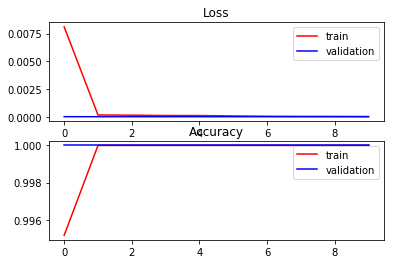

=== Evaluating model: A_A_resnet50-l1-final_10_v2.h5 ===

Accuracy: 1.000

Confusion Matrix
[[864]]

Classification Report
             precision    recall  f1-score   support

          1       1.00      1.00      1.00       864

avg / total       1.00      1.00      1.00       864

=== Evaluating model: A_A_resnet50-l1-best_10_v2.h5 ===

Accuracy: 1.000

Confusion Matrix
[[864]]

Classification Report
             precision    recall  f1-score   support

          1       1.00      1.00      1.00       864

avg / total       1.00      1.00      1.00       864

Epoch 1/10
97/97 [==============================] - 2s 24ms/step - loss: 0.0121 - acc: 0.9907 - val_loss: 1.7552e-07 - val_acc: 1.0000
Epoch 2/10
97/97 [==============================] - 1s 15ms/step - loss: 1.8265e-04 - acc: 1.0000 - val_loss: 1.5990e-07 - val_acc: 1.0000
Epoch 3/10
97/97 [==============================] - 1s 15ms/step - loss: 1.7663e-04 - acc: 1.0000 - val_loss: 1.4701e-07 - val_acc: 1.0000
Epoch 4/10
97/97 [

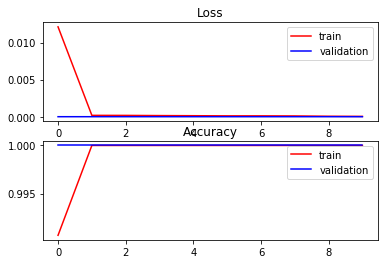

=== Evaluating model: A_A_resnet50-l2-final_10_v2.h5 ===

Accuracy: 1.000

Confusion Matrix
[[864]]

Classification Report
             precision    recall  f1-score   support

          1       1.00      1.00      1.00       864

avg / total       1.00      1.00      1.00       864

=== Evaluating model: A_A_resnet50-l2-best_10_v2.h5 ===

Accuracy: 1.000

Confusion Matrix
[[864]]

Classification Report
             precision    recall  f1-score   support

          1       1.00      1.00      1.00       864

avg / total       1.00      1.00      1.00       864



In [18]:
# In [55]:
final_model_name = get_model_file(DATA_DIR, "resnet50", "dot", "final")
model.save(final_model_name)
test_gen = data_generator(test_triples, VECTOR_SIZE, vec_dict, BATCH_SIZE)
final_accuracy = evaluate_model(final_model_name, test_gen)

test_gen = data_generator(test_triples, VECTOR_SIZE, vec_dict, BATCH_SIZE)
best_accuracy = evaluate_model(best_model_name, test_gen)

scores[1, 1] = best_accuracy if best_accuracy > final_accuracy else final_accuracy
# === Evaluating model: resnet50-dot-final.h5 ===

# Input: Elementwise Absolute Difference
# In [56]:
train_gen = data_generator(train_triples, VECTOR_SIZE, vec_dict, BATCH_SIZE)
val_gen = data_generator(val_triples, VECTOR_SIZE, vec_dict, BATCH_SIZE)
# In [57]:
input_1 = Input(shape=(VECTOR_SIZE,))
input_2 = Input(shape=(VECTOR_SIZE,))
merged = Lambda(absdiff, output_shape=absdiff_output_shape)([input_1, input_2])

fc1 = Dense(512, kernel_initializer="glorot_uniform")(merged)
fc1 = Dropout(0.2)(fc1)
fc1 = Activation("relu")(fc1)

fc2 = Dense(128, kernel_initializer="glorot_uniform")(fc1)
fc2 = Dropout(0.2)(fc2)
fc2 = Activation("relu")(fc2)

pred = Dense(2, kernel_initializer="glorot_uniform")(fc2)
pred = Activation("softmax")(pred)
# In [58]:
model = Model(inputs=[input_1, input_2], outputs=pred)
# model.summary()
# In [59]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
# In [60]:
best_model_name = get_model_file(DATA_DIR, "resnet50", "l1", "best")
checkpoint = ModelCheckpoint(best_model_name, save_best_only=True)
train_steps_per_epoch = len(train_triples) // BATCH_SIZE
val_steps_per_epoch = len(val_triples) // BATCH_SIZE
history = model.fit_generator(train_gen, steps_per_epoch=train_steps_per_epoch, 
                              epochs=NUM_EPOCHS, 
                              validation_data=val_gen, validation_steps=val_steps_per_epoch,
                              callbacks=[checkpoint])

plt.subplot(211)
plt.title("Loss")
plt.plot(history.history["loss"], color="r", label="train")
plt.plot(history.history["val_loss"], color="b", label="validation")
plt.legend(loc="best")

plt.subplot(212)
plt.title("Accuracy")
plt.plot(history.history["acc"], color="r", label="train")
plt.plot(history.history["val_acc"], color="b", label="validation")
plt.legend(loc="best")

plt.show()

# In [62]:
final_model_name = get_model_file(DATA_DIR, "resnet50", "l1", "final")
model.save(final_model_name)
test_gen = data_generator(test_triples, VECTOR_SIZE, vec_dict, BATCH_SIZE)
final_accuracy = evaluate_model(final_model_name, test_gen)

test_gen = data_generator(test_triples, VECTOR_SIZE, vec_dict, BATCH_SIZE)
best_accuracy = evaluate_model(best_model_name, test_gen)

scores[1, 2] = best_accuracy if best_accuracy > final_accuracy else final_accuracy
# === Evaluating model: resnet50-l1-final.h5 ===


# Input: Elementwise Euclidean Distance
# In [63]:
train_gen = data_generator(train_triples, VECTOR_SIZE, vec_dict, BATCH_SIZE)
val_gen = data_generator(val_triples, VECTOR_SIZE, vec_dict, BATCH_SIZE)
# In [64]:
input_1 = Input(shape=(VECTOR_SIZE,))
input_2 = Input(shape=(VECTOR_SIZE,))
merged = Lambda(euclidean_distance, 
                output_shape=euclidean_distance_output_shape)([input_1, input_2])

fc1 = Dense(512, kernel_initializer="glorot_uniform")(merged)
fc1 = Dropout(0.2)(fc1)
fc1 = Activation("relu")(fc1)

fc2 = Dense(128, kernel_initializer="glorot_uniform")(fc1)
fc2 = Dropout(0.2)(fc2)
fc2 = Activation("relu")(fc2)

pred = Dense(2, kernel_initializer="glorot_uniform")(fc2)
pred = Activation("softmax")(pred)
# In [65]:
model = Model(inputs=[input_1, input_2], outputs=pred)
# model.summary()
# In [66]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
# In [67]:
best_model_name = get_model_file(DATA_DIR, "resnet50", "l2", "best")
checkpoint = ModelCheckpoint(best_model_name, save_best_only=True)
train_steps_per_epoch = len(train_triples) // BATCH_SIZE
val_steps_per_epoch = len(val_triples) // BATCH_SIZE
history = model.fit_generator(train_gen, steps_per_epoch=train_steps_per_epoch, 
                              epochs=NUM_EPOCHS, 
                              validation_data=val_gen, validation_steps=val_steps_per_epoch,
                              callbacks=[checkpoint])

# In [68]:
plt.subplot(211)
plt.title("Loss")
plt.plot(history.history["loss"], color="r", label="train")
plt.plot(history.history["val_loss"], color="b", label="validation")
plt.legend(loc="best")

plt.subplot(212)
plt.title("Accuracy")
plt.plot(history.history["acc"], color="r", label="train")
plt.plot(history.history["val_acc"], color="b", label="validation")
plt.legend(loc="best")

plt.show()

# In [69]:
final_model_name = get_model_file(DATA_DIR, "resnet50", "l2", "final")
model.save(final_model_name)
test_gen = data_generator(test_triples, VECTOR_SIZE, vec_dict, BATCH_SIZE)
final_accuracy = evaluate_model(final_model_name, test_gen)

test_gen = data_generator(test_triples, VECTOR_SIZE, vec_dict, BATCH_SIZE)
best_accuracy = evaluate_model(best_model_name, test_gen)

scores[1, 3] = best_accuracy if best_accuracy > final_accuracy else final_accuracy
# === Evaluating model: resnet50-l2-final.h5 ===

Text(0.5,1,'Neural Network Classifiers with Image Vectors')

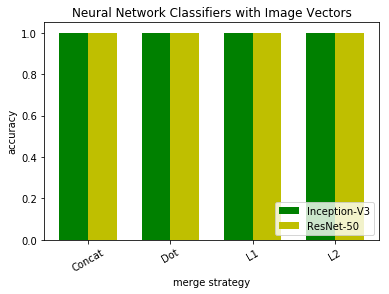

In [19]:
# In [71]:
width=0.35
plt.bar(np.arange(scores.shape[1]), scores[0], width, color="g", label="Inception-V3")
plt.bar(np.arange(scores.shape[1])+width, scores[1], width, color="y", label="ResNet-50")
plt.legend(loc=4)
plt.ylabel("accuracy")
plt.xlabel("merge strategy")
plt.xticks(np.arange(scores.shape[1])+0.5*width, ["Concat", "Dot", "L1", "L2"],
          rotation=30)
plt.title("Neural Network Classifiers with Image Vectors")
# Out[71]:
# <matplotlib.text.Text at 0x7fe1aa6d1050>

# In [ ]: